In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [3]:
data = pd.read_csv('usdtSentimet.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2018-02-13 00:00:00+00:00,1.000800,1.008650,0.995931,1.001100,2226759936,3.166667,-0.238520,0.596111,1.005190,1
1,2018-02-18 00:00:00+00:00,1.004680,1.016190,0.998832,1.005190,3124179968,2.733333,-0.273916,0.613889,1.000970,0
2,2018-02-21 00:00:00+00:00,1.005360,1.010390,0.988699,1.000970,3459830016,2.766667,-0.306809,0.630556,1.002840,1
3,2018-02-24 00:00:00+00:00,1.001140,1.014000,0.993887,1.002840,2417710080,2.833333,-0.301698,0.630556,1.000340,0
4,2018-02-25 00:00:00+00:00,1.004790,1.009000,0.996229,1.000340,1968850048,2.833333,-0.302900,0.630556,0.999561,0
...,...,...,...,...,...,...,...,...,...,...,...
303,2024-05-06 00:00:00+00:00,1.000329,1.001613,0.999593,1.000038,52931405950,2.133333,-0.266506,0.621111,0.999868,0
304,2024-05-09 00:00:00+00:00,0.999589,1.001198,0.999269,0.999868,46236991775,2.133333,-0.266504,0.621111,0.999861,0
305,2024-05-10 00:00:00+00:00,0.999896,1.002432,0.999312,0.999861,50244486838,2.066667,-0.236004,0.605556,0.999592,0
306,2024-05-14 00:00:00+00:00,0.999840,1.001147,0.999062,0.999592,57380795961,2.066667,-0.271010,0.622222,1.000098,1


In [4]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5967741935483871
Confusion Matrix:
[[15 18]
 [ 7 22]]


In [11]:
import pandas as pd

# Read the CSV file
data_from_usdt = pd.read_csv("usdt.csv")

# Get the last row
last_row_usdt = data_from_usdt.iloc[-1]

print("Last row from usdt.csv:")
print(last_row_usdt)

Last row from usdt.csv:
Date            2024-06-03 00:00:00+00:00
Open                             0.999479
High                             0.999846
Low                              0.999164
Close                            0.999544
Volume                        56233799680
Dividends                             0.0
Stock Splits                          0.0
Name: 2398, dtype: object


In [12]:
import pandas as pd

# Read the CSV file
sentiment_from_usdt = pd.read_csv("tether_sentiment.csv")

# Get the last row
last_row_usdt_sentiment = sentiment_from_usdt.iloc[-1]

print("Last row from tether_sentiment.csv:")
print(last_row_usdt_sentiment)

Last row from tether_sentiment.csv:
Unnamed: 0       2024-05-20
edit_count              2.1
sentiment         -0.326122
neg_sentiment      0.655556
Name: 307, dtype: object


In [13]:
# Function to fetch the latest data for USDT
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_usdt['Open'],
        "high": last_row_usdt['High'],
        "low": last_row_usdt['Low'],
        "close": last_row_usdt['Close'],
        "volume": last_row_usdt['Volume'],
        "edit_count": last_row_usdt_sentiment['edit_count'],
        "sentiment": last_row_usdt_sentiment['sentiment'],
        "neg_sentiment": last_row_usdt_sentiment['neg_sentiment']
    }
    return latest_data


In [14]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,0.999479,0.999846,0.999164,0.999544,56233799680,2.1,-0.326122,0.655556


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Bitcoin Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

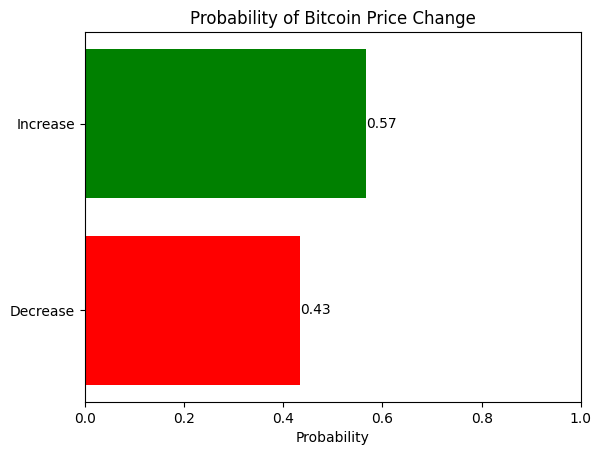

In [16]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [17]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.43
Probability of price increase: 0.57
